IN3190 Prosjekt oppgave


In [3]:
#først importerer det jeg trenger:
import numpy as np
from numpy import pi, exp, sin, log10
import matplotlib.pyplot as plt
from scipy.signal import tukey
import scipy.io
from scipy.interpolate import CubicSpline

For det første oppgaven så skriver jeg en funksjon som konvolverer et input signal x(n) med en FIR filter h(n). Funksjonene skal returnere kkonvulert signal

In [24]:
def konvin3190(x,ylen,h):
    M, N = len(h), len(x)
    y = np.zeros(M+N-1)
    
    for m in range(1, M):
        for n in range(1,N):
            o = n+m-1
            y[o] = y[o] + x[n]*h[m]
            
    if ylen == 0: #needs to return out-signal with the length of 'x' signal
        a, b = int(np.floor(0.5*(M-1))), int(np.ceil(0.5*(M-1) +1))
        return y[b:int(M+N-1-a)]
    else:
        return y

def list_konvin3190(x, ylen,h):
    m, n = np.shape(x)
    m = m-1
    box = np.zeros((m,n))
    fs_array = np.zeros((m,n))
    for i in range(n):
        box[:,i]= konvin3190(x[:,i], ylen, h)
    return box
    

Oppgave 1B: For den neste delen så skriver jeg en fuskjon 'frekspekin3190' som skal da ta inn signalet, og to parametere som bestemer hvor mange punkter til å sample og samplingsrekvensen. Funksjonen skal da returnere det komplekse frekvensspekteret og tilhørende frekvens 'f'. Etter det skal vi lage en funksjon som lager en liten filter som beskrevet i oppgave teksten.

In [5]:
def frekspekin3190(x, N, fs):
    X = np.zeros(N)
    w = np.linspace(0, pi, N)    #N-data punkter som omega(w)
    for i in range(N):
        for j in range(len(x)):
            X[i] = X[i] +x[j]*exp(-1J*w[i]*(j-1))
    f = (w*fs)/(2*pi) # radiener per sample

    return X, f

#lager en frekvens analyse for flere arrayer:

def list_frekspekin3190(x, N, fs):
    m, n = np.shape(x)
    list_frekv = np.zeros((m,n))
    fs_array = np.zeros((m,n))
    for i in range(n):
        list_frekv[:,i], fs_array[:,i] = frekspekin3190(x[:,i], N, fs)
    return list_frekv, fs_array


In [6]:
#filter funksjon 
def filter_h(size):
    return (1/5)*np.ones(size)

1C: For den neste delen skal vi plotte frekvens spekteret |H (ejω)| til h[n], |X (ejω)|og |Y (ejω)|til x[n], og y[n] = h[n] ∗x[n] i samme plott.

In [7]:
#oppgave 1c plott 
#verdier bestemt av ooppgave teksten:
f1, f2 = 10, 20                 #Hz
fs = 100                       #Hz
t_len = 5                       #sekunder 
t = np.linspace(0, t_len, fs)   #tidsarray
h = filter_h(4)                 #filter
x = sin(2*pi*f1*t) + sin(2*pi*f2*t)   #x[n] signal

#regner fram det vi skal plotte
y_sig = konvin3190(x,0, h)  #får fram y(n) ved å konolvere x(n) og h(n)
N = 1000

H, hf = frekspekin3190(h, N, fs)
X, fx = frekspekin3190(x, N, fs)
Y, fy = frekspekin3190(y_sig, N, fs)

<ipython-input-5-eac8cef6b0c3>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i] +x[j]*exp(-1J*w[i]*(j-1))


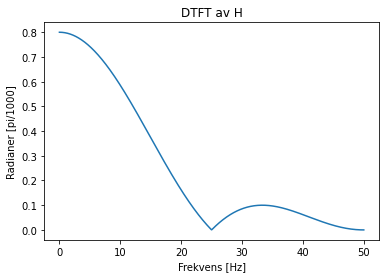

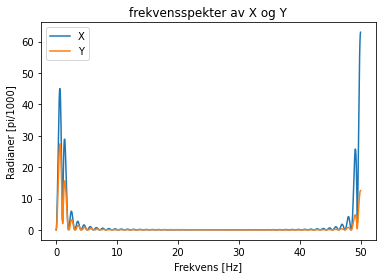

In [8]:
#plotter H først
plt.plot(hf, abs(H))
plt.title("DTFT av H")
plt.xlabel("Frekvens [Hz]")
plt.ylabel("Radianer [pi/1000]")
plt.show()

#plotter X og Y 
plt.plot(fx, abs(X), fy, abs(Y))
#plot(f2, abs(Y))
plt.title("frekvensspekter av X og Y")
plt.legend(["X", "Y"])
plt.xlabel("Frekvens [Hz]")
plt.ylabel("Radianer [pi/1000]")
plt.show()



Oppgave 2:
for den neste delen skal vi jobbe med støy fjerning

In [9]:
#oppgave 2a FIR lav-pass filtere 
h1 = [0.0002, 0.0001, -0.0001, -0.0005, -0.0011, -0.0017, -0.0019, 
    -0.0016, -0.0005, 0.0015, 0.0040, 0.0064, 0.0079, 0.0075, 0.0046, 
    -0.0009, -0.0084, -0.0164, -0.0227, -0.0248, -0.0203, -0.0079, 
    0.0127, 0.0400, 0.0712, 0.1021, 0.1284, 0.1461, 0.1523, 0.1461, 
    0.1284, 0.1021, 0.0712, 0.0400, 0.0127, -0.0079, -0.0203, -0.0248, 
    -0.0227, -0.0164, -0.0084, -0.0009, 0.0046, 0.0075, 0.0079, 0.0064, 
    0.0040, 0.0015, -0.0005, -0.0016, -0.0019, -0.0017, -0.0011, 
    -0.0005, -0.0001, 0.0001, 0.0002]

h2 = [-0.0002, -0.0001, 0.0003, 0.0005, -0.0001, -0.0009, -0.0007, 
    0.0007, 0.0018, 0.0005, -0.0021, -0.0027, 0.0004, 0.0042, 0.0031, 
    -0.0028, -0.0067, -0.0023, 0.0069, 0.0091, -0.0010, -0.0127, 
    -0.0100, 0.0077, 0.0198, 0.0075, -0.0193, -0.0272, 0.0014, 0.0386, 
    0.0338, -0.0246, -0.0771, -0.0384, 0.1128, 0.2929, 0.3734, 0.2929, 
    0.1128, -0.0384, -0.0771, -0.0246, 0.0338, 0.0386, 0.0014, -0.0272, 
    -0.0193, 0.0075, 0.0198, 0.0077, -0.0100, -0.0127, -0.0010, 0.0091, 
    0.0069, -0.0023, -0.0067, -0.0028, 0.0031, 0.0042, 0.0004, -0.0027, 
    -0.0021, 0.0005, 0.0018, 0.0007, -0.0007, -0.0009, -0.0001, 0.0005, 
    0.0003, -0.0001, -0.0002]

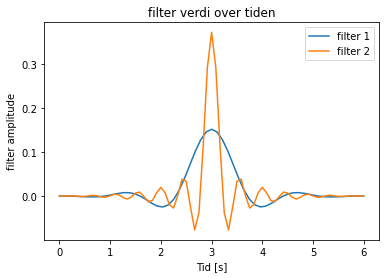

In [10]:
#oppgave 2a plotter filter over tid
time_h1 = np.linspace(0, 6, len(h1))
time_h2 = np.linspace(0, 6, len(h2))

plt.plot(time_h1, h1, time_h2, h2)
plt.title('filter verdi over tiden')
plt.legend(['filter 1', 'filter 2'])
plt.xlabel('Tid [s]')
plt.ylabel('filter amplitude')
plt.show()


<ipython-input-5-eac8cef6b0c3>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i] +x[j]*exp(-1J*w[i]*(j-1))


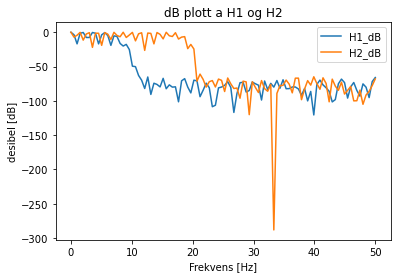

In [11]:
#plotter i frekensspekter i DB
#plotter i DB
N = 100
fs = 100

H1, H1f = frekspekin3190(h1,N, fs)
H2, H2f= frekspekin3190(h2, N, fs)

Hdb1 = 20*log10(abs(H1))
Hdb2 = 20*log10(abs(H2))

plt.plot(H1f, Hdb1, H2f, Hdb2)
plt.legend(['H1_dB', 'H2_dB'])
plt.title('dB plott a H1 og H2')
plt.xlabel("Frekvens [Hz]")
plt.ylabel("desibel [dB]")
plt.show()

fra plottet oppe, ser vi at H2 filtrer ikke så mange frekvenser som H1

Oppgave 2b

In [12]:
#importerer alle sub-filene
mat_fil = scipy.io.loadmat('vibishar.mat')

offset1 = np.array(mat_fil['offset1'])
offset2 = np.array(mat_fil['offset2'])
seis1 = np.array(mat_fil['seismogram1'])
seis2 = np.array(mat_fil['seismogram2'])
time = np.array(mat_fil['t']) 

print('lenth of time array:', len(time))
print('lenth of seis1 array:', len(seis1))
print('lenth of seis2 array:', len(seis2))

lenth of time array: 1501
lenth of seis1 array: 1501
lenth of seis2 array: 1501


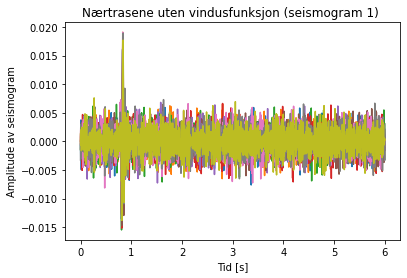

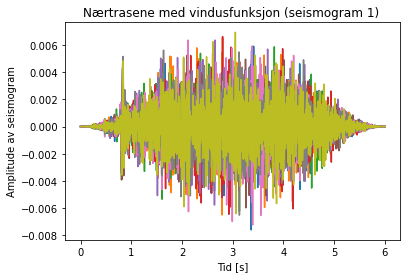

<ipython-input-5-eac8cef6b0c3>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i] +x[j]*exp(-1J*w[i]*(j-1))


ValueError: could not broadcast input array from shape (100) into shape (1501)

In [13]:
#tar en liten del av data-mengden
seis1_short = seis1[:, 0:9] #tar de første 10 data mengdene
seis2_short = seis2[:, 0:9] #tar de første 10 datamengder
time_short = time[:]

#vindus funksjon:
vin1 = tukey(len(seis1_short), 0.9) 
vin2 = tukey(len(seis2_short), 0.9)

#plotter seismogram 1
plt.title('Nærtrasene uten vindusfunksjon (seismogram 1) ')
plt.plot(time_short, seis1_short)
#plt.legend(['uten vindusfunksjon', 'med vindusfunksjon'])
plt.xlabel('Tid [s]')
plt.ylabel('Amplitude av seismogram')
plt.show()

"""
#plotter seismogram 2
plt.title('Nærtrasene uten vindusfunksjon (seismogram 2) ')
plt.plot(time_short, seis2_short)
#plt.legend(['uten vindusfunksjon', 'med vindusfunksjon'])
plt.xlabel('Tid [s]')
plt.ylabel('Amplitude av seismogram')
plt.show()
"""
#funksjon for å bruke vindusfunksjon
def window(seismogram_info):
    M, N = np.shape(seismogram_info)
    with_window = np.zeros((M,N))
    for i in range (N):
        with_window[:,i] = tukey(len(seismogram_info), 0.8)*seismogram_info[:,i]
    
    return with_window



#plotter det med vindusfunksjon seperat fordi det ble rotete, plotter første 10
plt.title('Nærtrasene med vindusfunksjon (seismogram 1) ')
plt.plot(time_short, window(seis1_short))
#plt.legend(['uten vindusfunksjon', 'med vindusfunksjon'])
plt.xlabel('Tid [s]')
plt.ylabel('Amplitude av seismogram')
plt.show()

#plotter frekvesnspekter med og uten vindusfunksjon:
F_seis1, fs_seis1 = list_frekspekin3190(seis1_short, N, fs)
#regner frekvensspektrum med vindusfunksjon
F_seis1_vin, fs_seis1_vin = list_frekspekin3190(window(seis1_short), N, fs)

plt.plot(fs_seis1, 20*log10(abs(F_seis1)))
plt.title('frekvensspekter uten vindus funksjon')
plt.xlabel('frekvens [Hz]')
plt.ylabel('desibel [dB]')
plt.show()


plt.plot(fs_seis1_vin, 20*log10(abs(F_seis1_vin)))
plt.title('frekvensspekter med vindus funksjon')
plt.xlabel('frekvens [Hz]')
plt.ylabel('dB')
plt.show()



Oppgave 2c: avender filtere på signalen

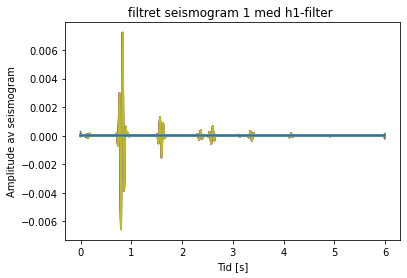

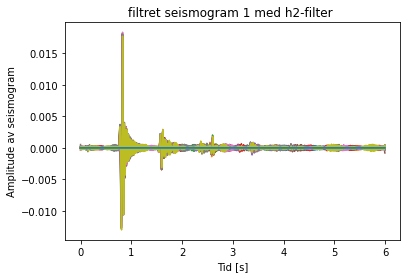

In [14]:
m,n = np.shape(seis1)
def filter_seis(seismogram, filter_type):
    m,n = np.shape(seismogram)
    filtered = np.zeros((m-1,n)) #tom array for filterert seismogram

    #filterer en rad om gangen ved å bruke hvor konvin funksjon:
    for i in range(9):  #første fem radene
        filtered[:,i] = konvin3190(seismogram[:,i],0, filter_type)
    return filtered

plt.title('filtret seismogram 1 med h1-filter ')
plt.plot(time[0:m-1], filter_seis(seis1, h1))
#plt.legend(['uten vindusfunksjon', 'med vindusfunksjon'])
plt.xlabel('Tid [s]')
plt.ylabel('Amplitude av seismogram')
plt.show()

plt.title('filtret seismogram 1 med h2-filter ')
plt.plot(time[0:m-1], filter_seis(seis1, h2))
#plt.legend(['uten vindusfunksjon', 'med vindusfunksjon'])
plt.xlabel('Tid [s]')
plt.ylabel('Amplitude av seismogram')
plt.show()

Oppgave 3a: Fjernfeltssignatur: ved å isolere offseten kan vi finne frekvensen til impulsen.

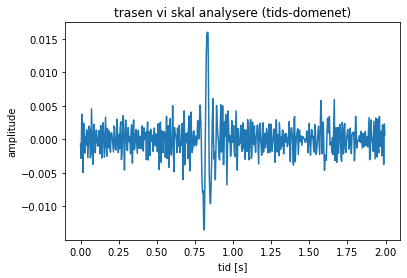

<ipython-input-5-eac8cef6b0c3>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i] +x[j]*exp(-1J*w[i]*(j-1))


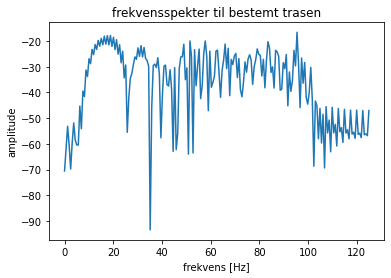

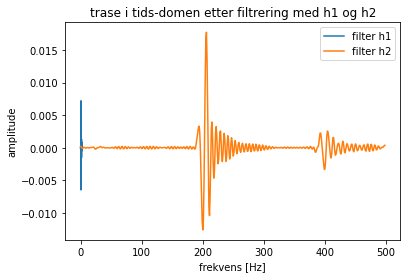

<ipython-input-5-eac8cef6b0c3>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i] +x[j]*exp(-1J*w[i]*(j-1))


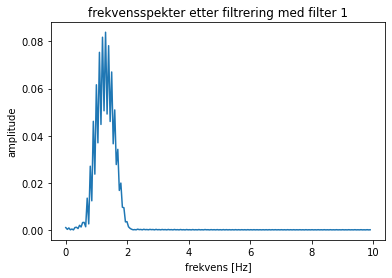

<ipython-input-5-eac8cef6b0c3>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i] +x[j]*exp(-1J*w[i]*(j-1))


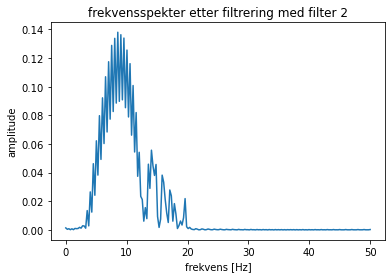

In [15]:
#bruker frekvensspekteret til filterene vi brukte: H1 og H2, H1f, H2f

#først isolerer den delen som vist i figur 9
offset1_isolated = seis1[0:500, 0]#røde område
time_isolated = time[0:500]

#plotter trasen i over den bestemte tids-intervallet
plt.plot(time_isolated, offset1_isolated)
plt.title('trasen vi skal analysere (tids-domenet)')
plt.xlabel('tid [s]')
plt.ylabel('amplitude')
plt.show()

#plotter frekvens spekteret:
sampling_f = 1/(time[2]-time[1])
f1, fs = frekspekin3190(offset1_isolated, 200, sampling_f)
plt.title('frekvensspekter til bestemt trasen')
plt.plot(fs, 20*log10(abs(f1)))
plt.xlabel('frekvens [Hz]')
plt.ylabel('amplitude')
plt.show()


#filtrer signalet vi har:
filt_iso1 = konvin3190(offset1_isolated,0, h1)
filt_iso2 = konvin3190(offset1_isolated,0, h2)
plt.plot(time_isolated[0:499], filt_iso1, filt_iso2)
plt.title('trase i tids-domen etter filtrering med h1 og h2')
plt.xlabel('frekvens [Hz]')
plt.ylabel('amplitude')
plt.legend(['filter h1', 'filter h2'])
plt.show()


#frekvens analyse av isolert+filteret signal:
F_filt1, fs_filt1 = frekspekin3190(filt_iso1, 200, 1/(t[1]-t[0]))
plt.plot(fs_filt1, abs(F_filt1))
plt.title('frekvensspekter etter filtrering med filter 1')
plt.xlabel('frekvens [Hz]')
plt.ylabel('amplitude')
plt.show()

F_filt2, fs_filt2 = frekspekin3190(filt_iso2, 200, 100)
plt.plot(fs_filt2, abs(F_filt2))
plt.title('frekvensspekter etter filtrering med filter 2')
plt.xlabel('frekvens [Hz]')
plt.ylabel('amplitude')
plt.show()



Oppgave 3b:

<ipython-input-5-eac8cef6b0c3>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i] +x[j]*exp(-1J*w[i]*(j-1))


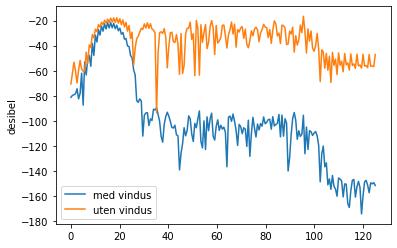

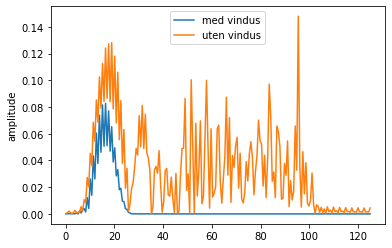

In [16]:
#for å ungå kant effekter, bruker vi vindusfunksjonen:
vin_of1 = tukey(len(filt_iso1), 0.5)*filt_iso1
F_wo1, fs_wo1 = frekspekin3190(vin_of1, 200, sampling_f)

plt.plot(fs_wo1, 20*log10(abs(F_wo1)), fs, 20*log10(abs(f1)))
plt.legend(['med vindus', 'uten vindus'])
plt.ylabel('desibel')
plt.show()

plt.plot(fs_wo1, abs(F_wo1), fs, abs(f1))
plt.legend(['med vindus', 'uten vindus'])
plt.ylabel('amplitude')
plt.show()

Fra plottet oppe så ser vi at frekvensen med størst amplitude var ved 17.7Hz 

oppgave 3c: hva er den vertikale oppløsningen dersom vi antar at frekvensen i bølgefeltet er den samme som den
dominante frekvensen i forrige oppgave?

In [17]:
C = 3000    #m/s
frekv = 17.7 #Hz
lmbda = C/frekv
print('bølgelengde =', lmbda,'meter')
vertikal_opp = (1/8)*lmbda
print('vertikal oppløsning =', vertikal_opp,'meter')

bølgelengde = 169.49152542372883 meter
vertikal oppløsning = 21.186440677966104 meter


Oppgave 4a og 4b: Et plott av nærtrasen med primærrefleksjonen og de tre første havbunnsmultiplene. Plott  impulsene i gatheret ved første offset, med hovedrefleksjonen som ett kryss og refleksjonene som sirkler

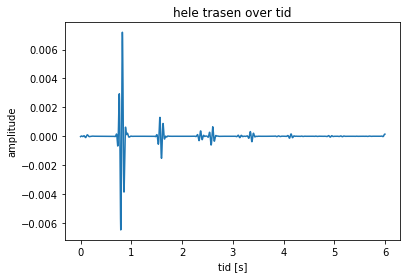

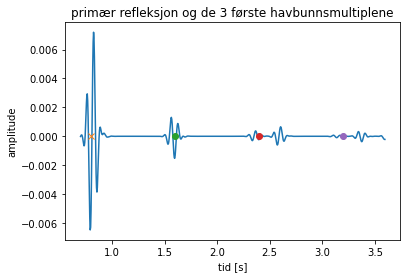

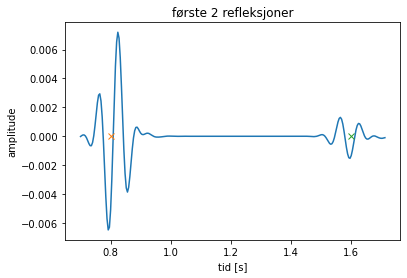

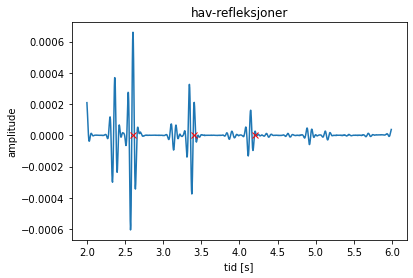

In [18]:
#plotter alle multipler (refleksjoner)
plt.plot(time[0:1500], konvin3190(seis1[:,0], 0, h1))
plt.title('hele trasen over tid')
plt.xlabel('tid [s]')
plt.ylabel('amplitude')
plt.show()

#plott av de 4 første refleksjoner (oppgave 4b)
plt.plot(time[175:900], konvin3190(seis1[175:901,0], 0, h1))
plt.plot(0.8, 0, marker = 'x') #hoved refleksjon 
plt.plot(1.6, 0, marker = 'o')
plt.plot(2.4, 0, marker = 'o')
plt.plot(3.2, 0, marker = 'o')
plt.title('primær refleksjon og de 3 første havbunnsmultiplene')
plt.xlabel('tid [s]')
plt.ylabel('amplitude')
plt.show()

#plott av de to første refleksjoner for å finne fram 
plt.plot(time[175:429], konvin3190(seis1[175:430,0], 0, h1))
plt.title('første 2 refleksjoner')
plt.plot(0.8, 0, marker = 'x')
plt.plot(1.6, 0, marker = 'x')
plt.xlabel('tid [s]')
plt.ylabel('amplitude')
plt.show()

#oppgave 4b 
plt.plot(time[500:1499], konvin3190(seis1[500:1500,0], 0, h1))
plt.title('hav-refleksjoner')
plt.plot(2.6, 0, 'rx')
plt.plot(3.4, 0, 'rx')
plt.plot(4.2, 0, 'rx')
plt.xlabel('tid [s]')
plt.ylabel('amplitude')
plt.show()


I oppgave 4a, ser vi at C_w er rundt 0.8sekunder 

Oppgave 5:

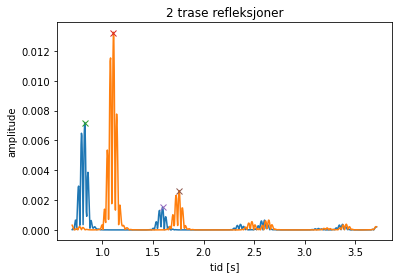

0.28400000000000014 0.16090000000000004
velocity = 1624.6953696181954


In [19]:
plt.plot(time[175:929], abs(konvin3190(seis1[175:930, 0], 0, h1)))
plt.plot(time[175:929], abs(konvin3190(seis1[175:930, 100], 0, h1)))
plt.title('2 trase refleksjoner')
plt.xlabel('tid [s]')
plt.ylabel('amplitude')
#første bølgetopper
plt.plot(0.824, 0.00716, marker = 'x')
plt.plot(1.108, 0.0132, marker = 'x')
#bølgetopper 2
plt.plot(1.5960, 0.001518, marker = 'x')
plt.plot(1.7599, 0.002627, marker = 'x')

plt.show()


s = 100 + 100            #første trasse er 100 meter fra kilde, og 10 etter det 
dt1 = 1.108 - 0.824 
dt2 = 1.7599 - 1.599
tid =  dt1 - dt2         #tidsforskjell mellom bølgetoppene sekunder
print(dt1, dt2)

V = s/tid          #m/s
print('velocity =', V)

oppgave 6

In [20]:
#python kode fra oppgaven
def nmo_correction(cmp, dt, offsets, velocities):
    nmo = np.zeros_like(cmp)
    nsamples = cmp.shape[0]
    times = np.arange(0, nsamples*dt, dt)
    for i, t0 in enumerate(times):
        for j, x in enumerate(offsets):
            t = reflection_time(t0, x, velocities[i])
            amplitude = sample_trace(cmp[:, j], t, dt)
            if amplitude is not None:
                nmo[i, j] = amplitude
    return nmo

def reflection_time(t0, x, vnmo):
    t = np.sqrt(t0**2 + x**2/vnmo**2)
    return t


def sample_trace(trace, time, dt):
    before = int(np.floor(time/dt))
    N = trace.size
    samples = np.arange(before - 1, before + 3)
    if any(samples < 0) or any(samples >= N):
        amplitude = None
    else:
        times = dt*samples
        amps = trace[samples]
        interpolator = CubicSpline(times, amps)
        amplitude = interpolator(time)
    return amplitude

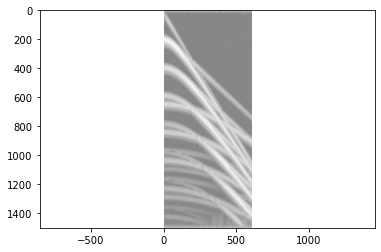

In [29]:
#nmo_val = nmo_correction(seis1[:,0], offset1[:,0],6, 1600)
f_seis = list_konvin3190(seis1, 0, h1)
log_seis = 20*log10(abs(f_seis))

#plott av filtrert data:


plt.imshow(log_seis, cmap='gray')
plt.axis('equal')
plt.show()
plt.title('filtered')


Oppgave 7